In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import yfinance as yf

In [3]:
tickers = ['ESGU', 'SPY']
df = yf.download(tickers, start='2016-01-01', end='2025-01-01')['Close']
df.index = pd.to_datetime(df.index)

print(df.head())
print()
print(df.info())


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  2 of 2 completed

Ticker      ESGU         SPY
Date                        
2016-01-04   NaN  171.855881
2016-01-05   NaN  172.146576
2016-01-06   NaN  169.975082
2016-01-07   NaN  165.897095
2016-01-08   NaN  164.076172

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2264 entries, 2016-01-04 to 2024-12-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ESGU    2030 non-null   float64
 1   SPY     2264 non-null   float64
dtypes: float64(2)
memory usage: 53.1 KB
None


In [4]:
na_rows = df.isna()
print(f"Number of rows with NaN values: {na_rows.sum()}")

Number of rows with NaN values: Ticker
ESGU    234
SPY       0
dtype: int64


- Some of the rows for ESGU have NaN values, because ESGU wasn't on the market yet, let's then delete them

In [5]:
df = df.dropna()

In [6]:
returns_df = df.pct_change().dropna()
print(returns_df.head())

Ticker          ESGU       SPY
Date                          
2016-12-07  0.000000  0.013081
2016-12-08  0.000000  0.002449
2016-12-09  0.000000  0.006040
2016-12-12  0.000000 -0.001148
2016-12-13  0.029217  0.006674


In [7]:
print(df.head(10))

Ticker           ESGU         SPY
Date                             
2016-12-06  42.632637  192.471298
2016-12-07  42.632637  194.988922
2016-12-08  42.632637  195.466492
2016-12-09  42.632637  196.647156
2016-12-12  42.632637  196.421417
2016-12-13  43.878220  197.732300
2016-12-14  43.878220  196.100204
2016-12-15  43.878220  196.907623
2016-12-16  43.878220  196.522446
2016-12-19  43.878220  196.950378


- Seems like there werent much volatility at the start of ESGU, but the data is still valid

Ticker          ESGU       SPY
Date                          
2016-12-07  1.000000  1.013081
2016-12-08  1.000000  1.015562
2016-12-09  1.000000  1.021696
2016-12-12  1.000000  1.020523
2016-12-13  1.029217  1.027334
Ticker          ESGU       SPY
Date                          
2024-12-24  3.092457  3.114732
2024-12-26  3.091989  3.114940
2024-12-27  3.058536  3.082150
2024-12-30  3.026252  3.046978
2024-12-31  3.013619  3.035893


<Axes: xlabel='Date'>

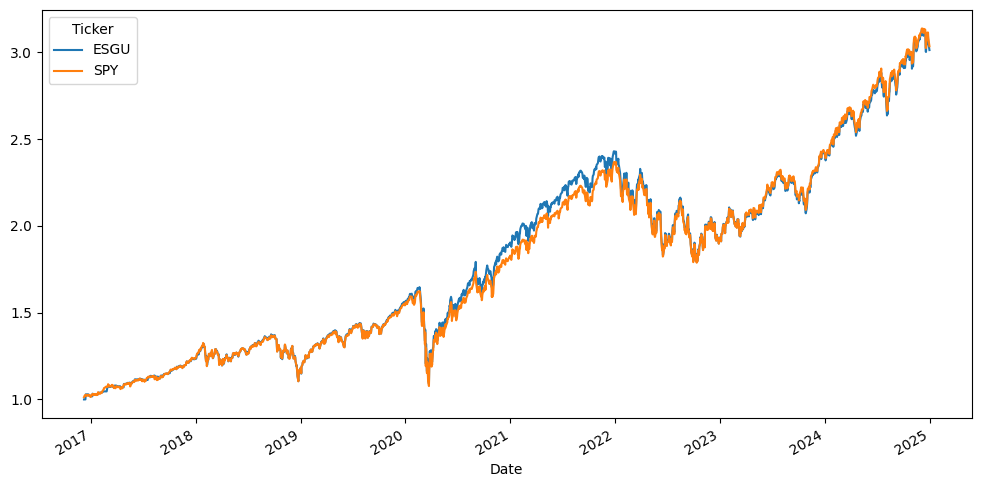

In [8]:
cumulative_returns = (1 + returns_df).cumprod()

print(cumulative_returns.head())
print(cumulative_returns.tail())

cumulative_returns.plot(figsize=(12, 6))

In [9]:
end_value = cumulative_returns.iloc[-1]
print(f"End value of ESGU: {end_value['ESGU']:.2f}")
print(f"End value of SPY: {end_value['SPY']:.2f}")

End value of ESGU: 3.01
End value of SPY: 3.04


- Over the past 9 years there seem to be almost no difference in returns of ESG vs non-ESG ETFs

In [10]:
standard_deviation = returns_df.std() * (252 ** 0.5)  # Annualized standard deviation
print(f"Standard deviation of ESGU: {standard_deviation['ESGU']:.4f}")
print(f"Standard deviation of SPY: {standard_deviation['SPY']:.4f}")
print()

mean_returns = returns_df.mean()*100
print(f"Mean daily returns of ESGU (%): {mean_returns['ESGU']:.4f}")
print(f"Mean daily returns of SPY (%): {mean_returns['SPY']:.4f}")
print()

median_returns = returns_df.median()*100
print(f"Median daily returns of ESGU (%): {median_returns['ESGU']:.4f}")
print(f"Median daily returns of SPY (%): {median_returns['SPY']:.4f}")
print()

min_returns = returns_df.min()*100
print(f"Minimum daily returns of ESGU (%): {min_returns['ESGU']:.4f}")
print(f"Minimum daily returns of SPY (%): {min_returns['SPY']:.4f}")
print()

max_returns = returns_df.max()*100
print(f"Maximum daily returns of ESGU (%): {max_returns['ESGU']:.4f}")
print(f"Maximum daily returns of SPY (%): {max_returns['SPY']:.4f}")


Standard deviation of ESGU: 0.1875
Standard deviation of SPY: 0.1830

Mean daily returns of ESGU (%): 0.0614
Mean daily returns of SPY (%): 0.0614

Median daily returns of ESGU (%): 0.0330
Median daily returns of SPY (%): 0.0728

Minimum daily returns of ESGU (%): -12.0026
Minimum daily returns of SPY (%): -10.9424

Maximum daily returns of ESGU (%): 9.6939
Maximum daily returns of SPY (%): 9.0603


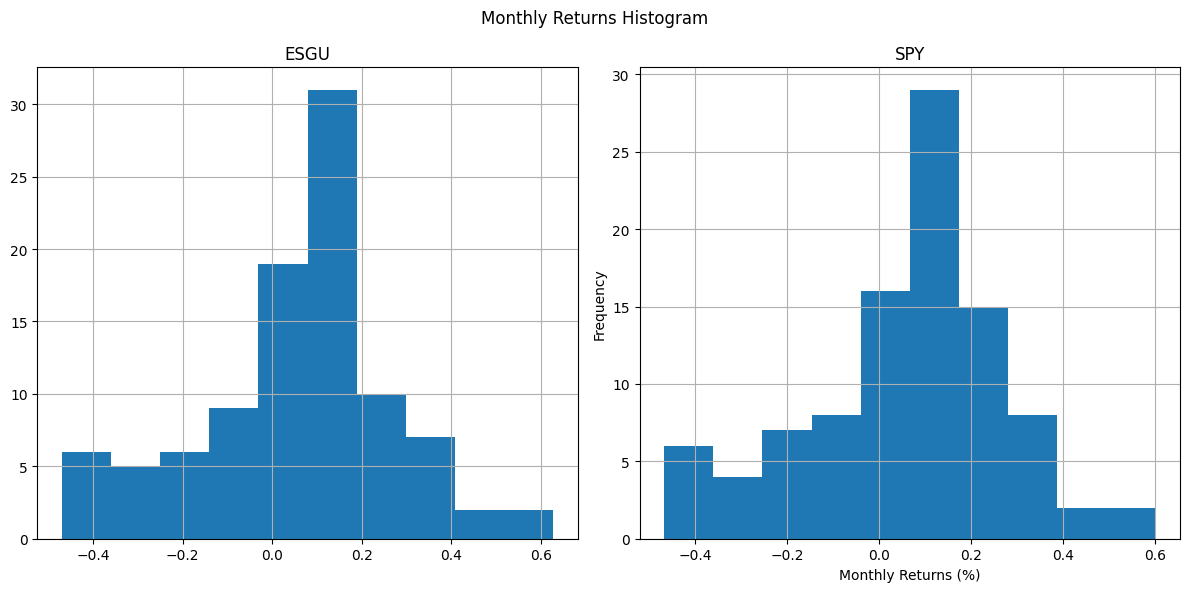

In [11]:
monthly_returns = returns_df.resample('ME').mean()
monthly_returns = monthly_returns * 100  # Convert to percentage

monthly_returns.hist(bins=10, figsize=(12, 6), layout=(1, 2))
plt.suptitle('Monthly Returns Histogram')
plt.xlabel('Monthly Returns (%)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


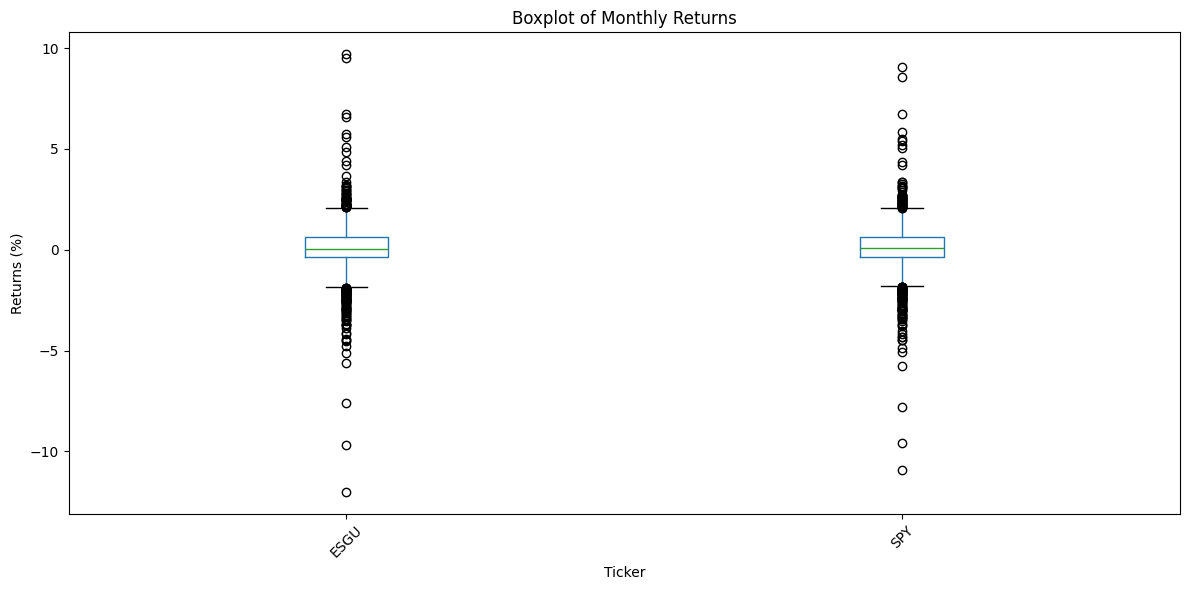

In [12]:
returns_perc = returns_df * 100  # Convert to percentage
returns_perc.boxplot(figsize=(12, 6), grid=False)
plt.title('Boxplot of Monthly Returns')
plt.ylabel('Returns (%)')
plt.xlabel('Ticker')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

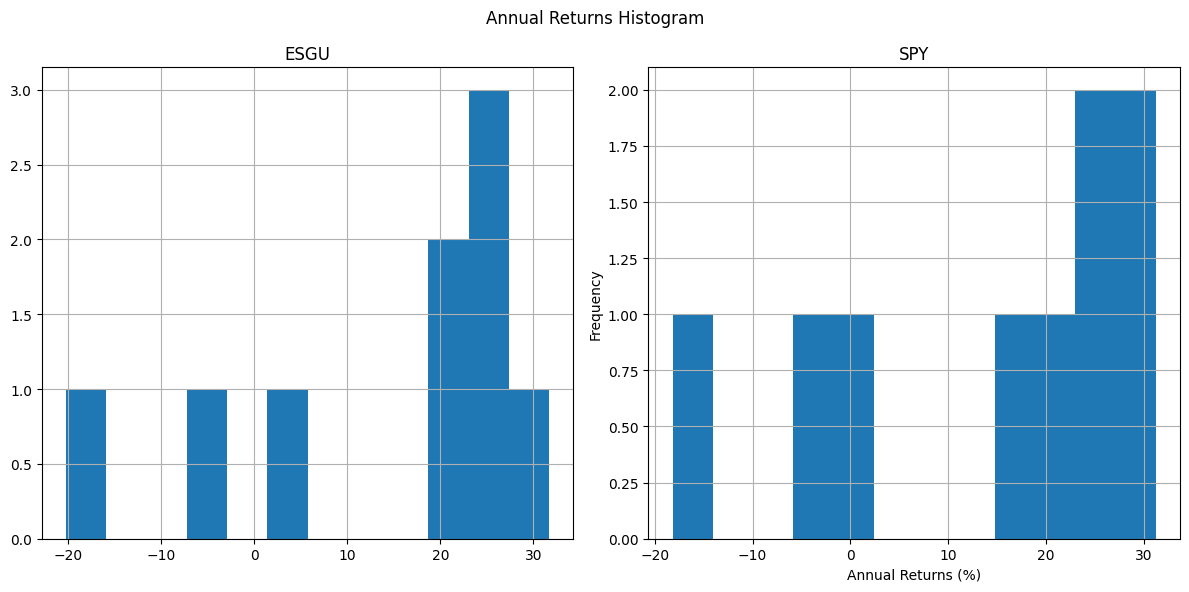

In [13]:
annual_returns = returns_df.resample('YE').apply(lambda x: (1 + x).prod() - 1)
annual_returns = annual_returns * 100  # Convert to percentage	

annual_returns.hist(bins=12, figsize=(12, 6), layout=(1, 2))
plt.suptitle('Annual Returns Histogram')
plt.xlabel('Annual Returns (%)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [15]:
risk_free_rate = 0.01  # Example risk-free rate of 1%

sharpe_ratio = (mean_returns - risk_free_rate) / standard_deviation
print(f"Sharpe Ratio of ESGU: {sharpe_ratio['ESGU']:.4f}")
print(f"Sharpe Ratio of SPY: {sharpe_ratio['SPY']:.4f}")

Sharpe Ratio of ESGU: 0.2740
Sharpe Ratio of SPY: 0.2810
